## **Provide Insights to Chief Operations in Transportation Domain**

- **Domain** :- Transportation & Mobilty
- **Fuctions** :- Operatins

#### **Problem Statements** 



Goodcabs, a cab service company established two years ago, has gained a strong foothold in the Indian market by focusing on tier-2 cities. Unlike other cab service providers, Goodcabs is committed to supporting local drivers, helping them make a sustainable living in their hometowns while ensuring excellent service to passengers. With operations in ten tier-2 cities across India, Goodcabs has set ambitious performance targets for 2024 to drive growth and improve passenger satisfaction. 

#### **Project Goals**

The analysis is centered around growing trip volumes, passenger satisfaction, and repeat bookings for Goodcabs. Through the determination of important trends and operational optimization, overall performance is aimed to be enhanced. These findings will assist Goodcabs in reaching its customer retention and growth goals.

#### **Data Overview**


![ED Diagram](ERD.png)

#### Import Necessary Library 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
city_target = pd.read_csv('city_target_passenger_rating.csv')
city_target.head(5)

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50
3,MP01,8.00
4,RJ01,8.25


In [7]:
dim_city = pd.read_csv('dim_city.csv')
dim_city.head(5)

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore


In [16]:
dim_date = pd.read_csv('dim_date.csv',parse_dates=['date','start_of_month'])
dim_date.head(5)

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday
2,2024-01-03,2024-01-01,January,Weekday
3,2024-01-04,2024-01-01,January,Weekday
4,2024-01-05,2024-01-01,January,Weekday


In [9]:
dim_repeat_trip = pd.read_csv('dim_repeat_trip_distribution.csv', parse_dates=['month'], index_col='month')
dim_repeat_trip.head(5)

,city_id,trip_count,repeat_passenger_count
month,,,
2024-01-01,AP01,10-Trips,7
2024-01-01,AP01,2-Trips,352
2024-01-01,AP01,3-Trips,158
2024-01-01,AP01,4-Trips,53
2024-01-01,AP01,5-Trips,38


In [10]:
fact_passenger = pd.read_csv('fact_passenger_summary.csv', parse_dates=['month'], index_col='month')
fact_passenger.head(5)

,city_id,new_passengers,repeat_passengers,total_passengers
month,,,,
2024-01-01,AP01,2513,650,3163
2024-01-01,CH01,3920,720,4640
2024-01-01,GJ01,2432,1184,3616
2024-01-01,GJ02,2089,544,2633
2024-01-01,KA01,1957,172,2129


In [52]:
fact_trips = pd.read_csv('fact_trips.csv', parse_dates=['date'])
fact_trips.head(5)

,trip_id,date,city_id,passenger_type,distance_travelled_km,fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [12]:
monthly_target = pd.read_csv('monthly_target_new_passengers.csv', parse_dates=['month'], index_col='month')
monthly_target.head(5)

,city_id,target_new_passengers
month,,
2024-05-01,GJ01,1500
2024-05-01,GJ02,1500
2024-03-01,GJ01,2000
2024-05-01,UP01,2000
2024-05-01,MP01,2000


In [13]:
monthly_target_trips = pd.read_csv('monthly_target_trips.csv', parse_dates=['month'], index_col='month')
monthly_target_trips.head(5)

,city_id,total_target_trips
month,,
2024-03-01,MP01,7000
2024-05-01,KA01,2500
2024-04-01,UP01,11000
2024-02-01,GJ02,6000
2024-05-01,KL01,9000


#### EDA 

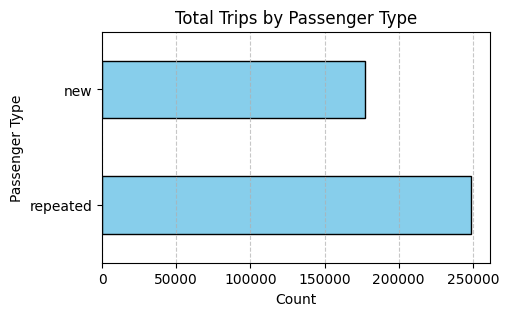

In [14]:
ax = fact_trips['passenger_type'].value_counts().plot(
    kind='barh', 
    figsize=(5,3),  
    edgecolor='black', 
    color='skyblue'  
)

ax.set_title("Total Trips by Passenger Type")
ax.set_xlabel("Count")
ax.set_ylabel("Passenger Type")
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


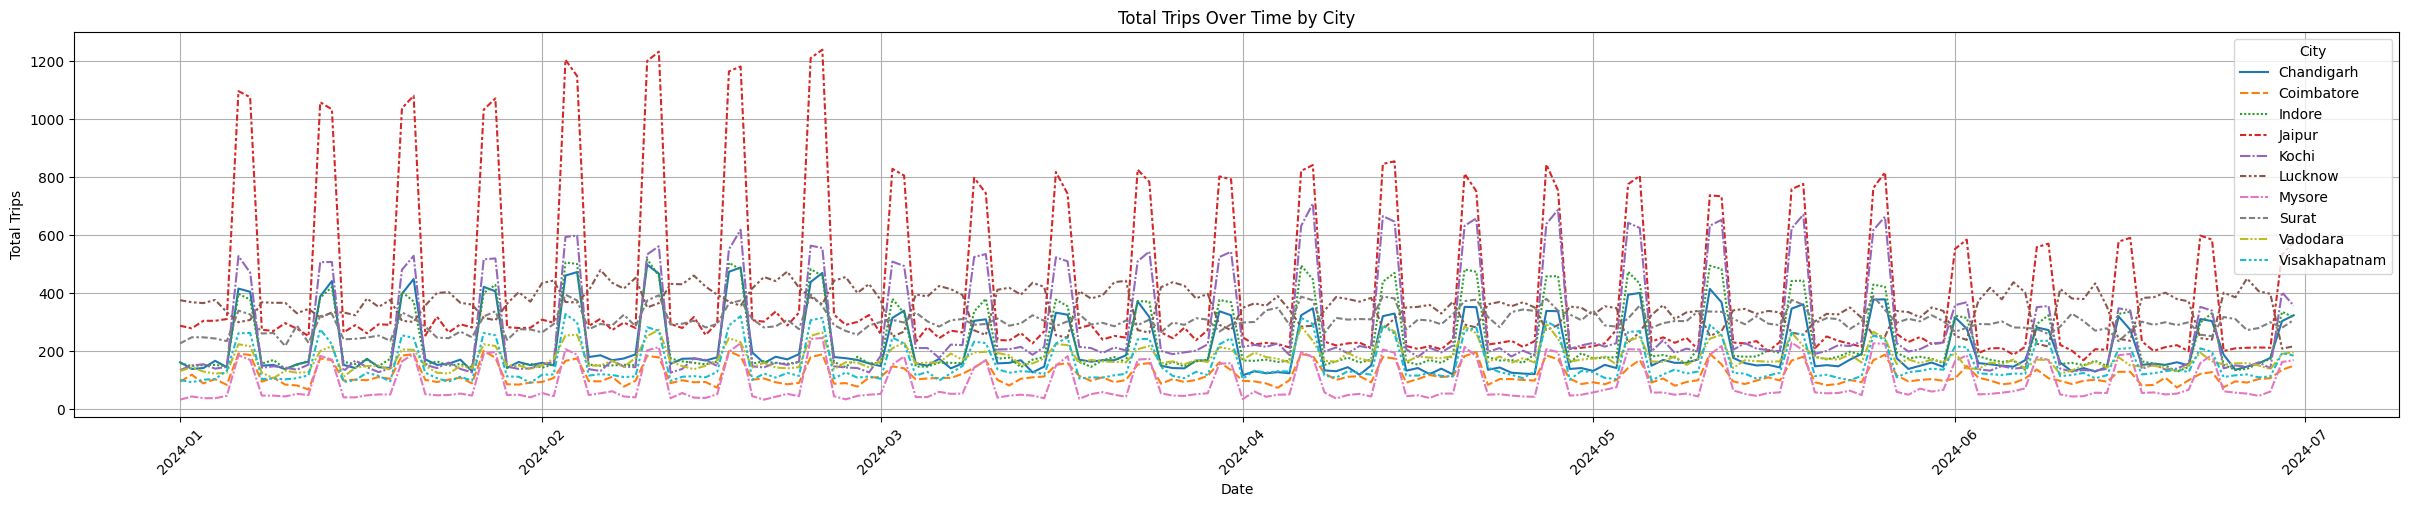

In [58]:
monthly_city = fact_trips.merge(dim_city, on='city_id', how='left')

monthly_data = monthly_city.pivot_table(values='trip_id', index='date', columns='city_name', aggfunc='count').fillna(0)
monthly_data = monthly_data.sort_index()

plt.figure(figsize=(30, 5))
sns.lineplot(data=monthly_data)

plt.title('Total Trips Over Time by City')
plt.ylabel('Total Trips')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='City')
plt.show()